In [42]:
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from collections import Counter
import shutil

In [43]:
dnCsv=pd.read_csv('apr_19_cutFiles_sol.csv')
dnCsv=dnCsv.rename(columns={ dnCsv.columns[0]: "fileName" })
dnCsv['fileName'] = [(word.title()[:-4].lower()) for word in dnCsv['fileName']]
print(dnCsv.head())
print(dnCsv.shape)

                                            fileName       SOL
0  landsatplusnightlightsindia-0000032768-0000000...  0.000000
1  landsatplusnightlightsindia-0000016384-0000016...  0.000000
2  landsatplusnightlightsindia-0000000000-0000016...  9.012451
3  landsatplusnightlightsindia-0000000000-0000016...  8.636719
4  landsatplusnightlightsindia-0000000000-0000032...  0.000000
(535513, 2)


In [44]:
mypath = 'apr_19_cutFiles_rgb_1'
filteredFiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
filteredFiles = [word[:-4].lower() for word in filteredFiles]

In [45]:
filteredDnCsv=dnCsv[dnCsv['fileName'].isin(filteredFiles)]
print(filteredDnCsv.head())
print(filteredDnCsv.shape)

                                            fileName       SOL
0  landsatplusnightlightsindia-0000032768-0000000...  0.000000
1  landsatplusnightlightsindia-0000016384-0000016...  0.000000
2  landsatplusnightlightsindia-0000000000-0000016...  9.012451
3  landsatplusnightlightsindia-0000000000-0000016...  8.636719
4  landsatplusnightlightsindia-0000000000-0000032...  0.000000
(472743, 2)


In [46]:
solValues=filteredDnCsv['SOL'].values

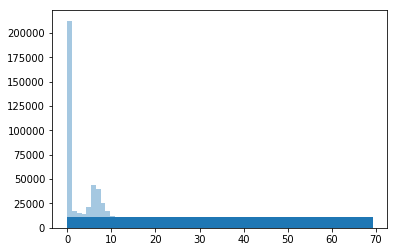

In [47]:
sns.distplot(solValues, bins=64, kde=False, rug=True)

In [48]:
solValues=solValues.reshape(-1, 1)
print(solValues.shape)
gmm = GaussianMixture(n_components=3)
gmm.fit(solValues)
print(gmm.means_)
print('\n')
print(gmm.covariances_)

(472743, 1)
[[6.19119926e+00]
 [2.74037221e+01]
 [8.44932261e-07]]


[[[1.26426257e+01]]

 [[2.99371979e+02]]

 [[1.00267897e-06]]]


In [49]:
gmm.predict_proba([[0.1]])

array([[0.96940701, 0.03059299, 0.        ]])

In [50]:
sol_prob = gmm.predict_proba(solValues)
sol_pred = gmm.predict(solValues)

In [51]:
filteredDnCsv['maxProb'] = [max(z) for z in sol_prob]
filteredDnCsv['class'] = sol_pred

/home/satbigvm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/satbigvm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
filteredDnCsv.head()

,fileName,SOL,maxProb,class
0,landsatplusnightlightsindia-0000032768-0000000...,0.000000,0.999912,2
1,landsatplusnightlightsindia-0000016384-0000016...,0.000000,0.999912,2
2,landsatplusnightlightsindia-0000000000-0000016...,9.012451,0.980703,0
3,landsatplusnightlightsindia-0000000000-0000016...,8.636719,0.982534,0
4,landsatplusnightlightsindia-0000000000-0000032...,0.000000,0.999912,2


In [53]:
filteredDnCsv.shape

(472743, 4)

In [54]:
for z in [0.9,0.95,0.99]:
    print('z:',z,':::',(filteredDnCsv.shape[0]-filteredDnCsv[filteredDnCsv['maxProb']>z].shape[0])/filteredDnCsv.shape[0])

z: 0.9 ::: 0.03595822677437847
z: 0.95 ::: 0.05770577248103092
z: 0.99 ::: 0.5700793031308766


In [55]:
sureClassFiles=filteredDnCsv[filteredDnCsv['maxProb']>0.95].copy()

In [56]:
print(Counter(filteredDnCsv['class'].values))
print(Counter(sureClassFiles['class'].values))

Counter({0: 261025, 2: 186089, 1: 25629})
Counter({0: 240177, 2: 186073, 1: 19213})


In [57]:
print('0.01 percent =',filteredDnCsv.shape[0]/100)
print(filteredDnCsv[filteredDnCsv['SOL']>1].shape[0]/filteredDnCsv.shape[0])
print(filteredDnCsv[filteredDnCsv['SOL']>5].shape[0]/filteredDnCsv.shape[0])
print(filteredDnCsv[filteredDnCsv['SOL']>10].shape[0]/filteredDnCsv.shape[0])
print(filteredDnCsv[filteredDnCsv['SOL']>15].shape[0]/filteredDnCsv.shape[0])
print(filteredDnCsv[filteredDnCsv['SOL']>10].shape)

0.01 percent = 4727.43
0.5535650448552385
0.4272638621830466
0.1303308563003577
0.06109873652280415
(61613, 4)


In [67]:
builtUpDf=filteredDnCsv[filteredDnCsv['SOL']>16].copy()
nonBuiltUpDf=filteredDnCsv[filteredDnCsv['SOL']<1].copy()

for zx in range(10): 
    builtUpDf = builtUpDf.sample(frac=1).reset_index(drop=True)
    nonBuiltUpDf = nonBuiltUpDf.sample(frac=1).reset_index(drop=True)

nonBuiltUp_train = nonBuiltUpDf[:100000].copy()
nonBuiltUp_test = nonBuiltUpDf[100001:110000].copy()


builtUp_train = builtUpDf[:23000].copy()
builtUp_test = builtUpDf[23001:25930].copy()

print(builtUp_train.shape)
print(builtUp_test.shape)
print(nonBuiltUp_train.shape)
print(nonBuiltUp_test.shape)

(23000, 4)
(2929, 4)
(100000, 4)
(9999, 4)


In [68]:
for curr in builtUp_train['fileName'].values:
    shutil.copy2('./rgb_lower/'+curr+'.png', './splitData_25_100/train/bu/'+curr+'.png')
for curr in builtUp_test['fileName'].values:
    shutil.copy2('./rgb_lower/'+curr+'.png', './splitData_25_100/test/bu/'+curr+'.png')
for curr in nonBuiltUp_train['fileName'].values:
    shutil.copy2('./rgb_lower/'+curr+'.png', './splitData_25_100/train/nbu/'+curr+'.png')
for curr in nonBuiltUp_test['fileName'].values:
    shutil.copy2('./rgb_lower/'+curr+'.png', './splitData_25_100/test/nbu/'+curr+'.png')

In [70]:
cz = 0
cz_value = 50
for curr in builtUp_train['fileName'].values:
    shutil.copy2('./rgb_lower/'+curr+'.png', './sample/train_bu/'+curr+'.png')
    cz+=1
    if(cz==cz_value):
        break
cz = 0
for curr in builtUp_test['fileName'].values:
    shutil.copy2('./rgb_lower/'+curr+'.png', './sample/test_bu/'+curr+'.png')
    cz+=1
    if(cz==cz_value):
        break
cz = 0
for curr in nonBuiltUp_train['fileName'].values:
    shutil.copy2('./rgb_lower/'+curr+'.png', './sample/train_nbu/'+curr+'.png')
    cz+=1
    if(cz==cz_value):
        break
cz = 0
for curr in nonBuiltUp_test['fileName'].values:
    shutil.copy2('./rgb_lower/'+curr+'.png', './sample/test_nbu/'+curr+'.png')
    cz+=1
    if(cz==cz_value):
        break